In [1]:
!pip install yfinance
!pip install pandas
!pip install matplotlib
!pip install numpy pandas-ta

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 4.0 MB/s eta 0:00:00 eta -:--:--
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 3.9 MB/s eta 0:00:003.8 MB/s eta 0:00:01
  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15548 sha256=c46fe9bfe1d393ebb2fd6a2e7c9125217ac61b6c349cb301cef71552fec78714
  S

/tmp/ipykernel_11955/1044022766.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Successfully downloaded data.
------------------------------
Data with Daily Returns calculated:
Price            Close        High         Low        Open     Volume  \
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL   
Date                                                                    
2022-01-04  176.378372  179.558489  175.809091  179.254221   99310400   
2022-01-05  171.686707  176.839663  171.411883  176.290017   94537600   
2022-01-06  168.820648  172.059652  168.467302  169.507706   96904000   
2022-01-07  168.987518  170.921105  167.868591  169.694211   86709100   
2022-01-10  169.007172  169.311439  165.061475  165.954658  106765600   

Price      Daily_Return  
Ticker                   
Date                     
2022-01-04    -0.012691  
2022-01-05    -0.026600  
2022-01-06    -0.016694  
2022-01-07     0.000988  
2022-01-10     0.000116  
------------------------------


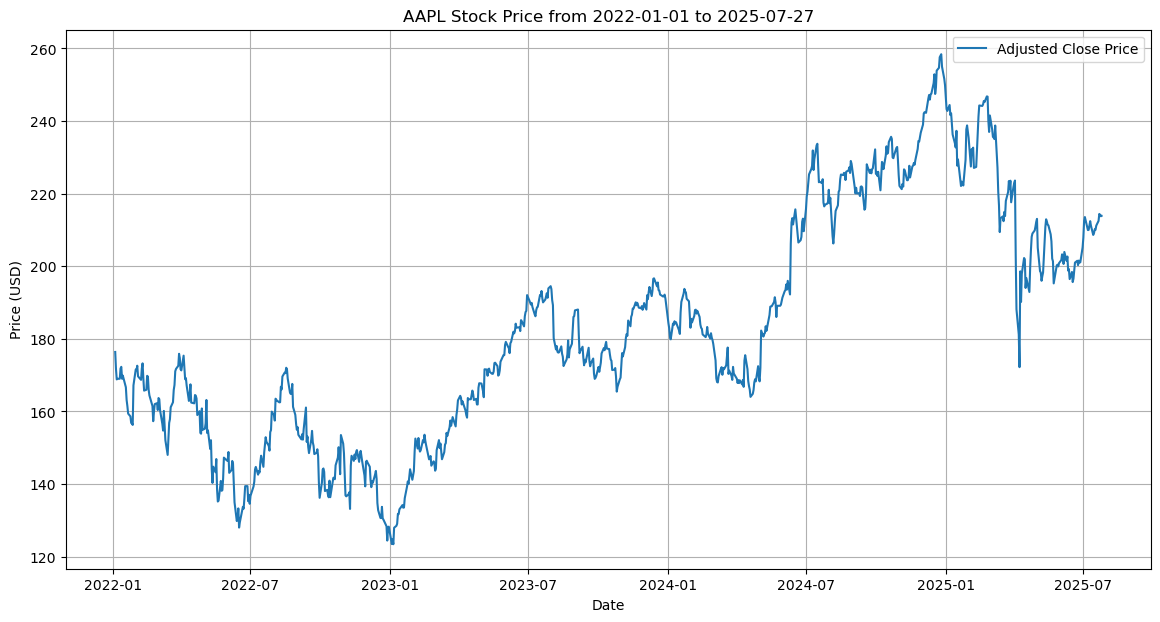

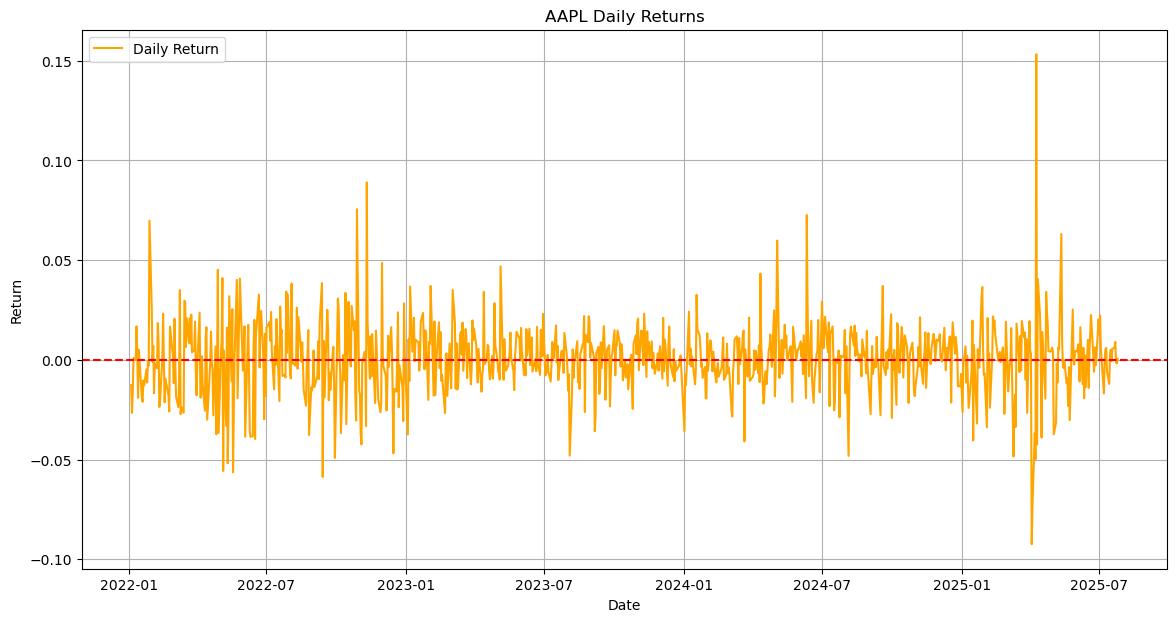

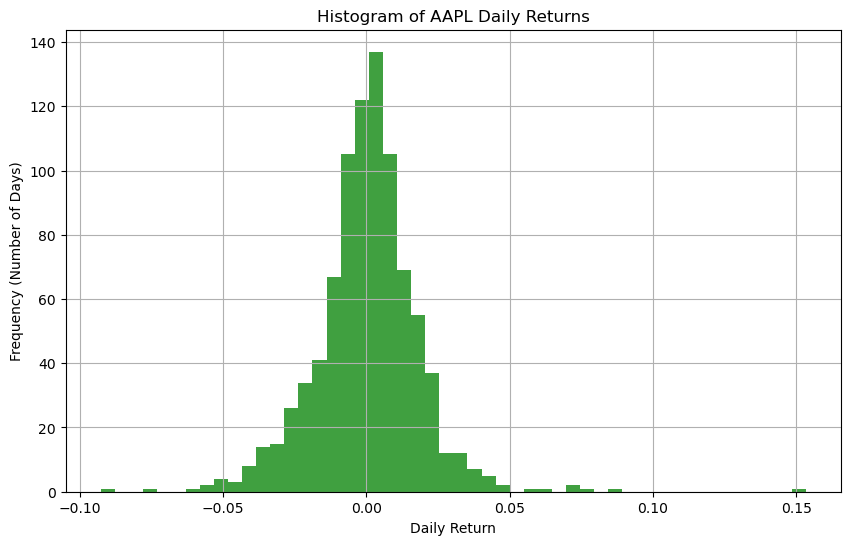

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

def analyze_stock(ticker, start_date, end_date):
    """
    Downloads stock data, calculates daily returns, and visualizes the results.

    Args:
        ticker (str): The stock ticker symbol (e.g., 'AAPL' for Apple).
        start_date (str): The start date for the data in 'YYYY-MM-DD' format.
        end_date (str): The end date for the data in 'YYYY-MM-DD' format.
    """
    try:
        # --- 1. Download Stock Data (Gathering the Evidence) ---
        # We tell yfinance to download the historical data for our chosen stock
        # and date range.
        print(f"Downloading data for {ticker}...")
        stock_data = yf.download(ticker, start=start_date, end=end_date)

        if stock_data.empty:
            print(f"No data found for ticker {ticker} in the specified date range.")
            return

        print(f"Successfully downloaded data.")
        print("-" * 30)

        # --- 2. Calculate Daily Returns (Analyzing the Evidence) ---
        # The daily return is the percentage change in price from one day to the next.
        # .pct_change() is a shortcut to do this calculation: (today - yesterday) / yesterday.
        # We use 'Close' because it's adjusted for dividends and stock splits.
        stock_data['Daily_Return'] = stock_data['Close'].pct_change()

        # The first row will have no return value because there's no previous day,
        # so we remove it to keep our data clean.
        stock_data = stock_data.dropna()

        print("Data with Daily Returns calculated:")
        print(stock_data.head())
        print("-" * 30)

        # --- 3. Visualize the Results (Creating the Detective Report) ---
        # Now we create our charts to tell the story of the stock.

        # Chart 1: The stock's price journey over time.
        plt.figure(figsize=(14, 7)) # Set the size of our plot window
        plt.plot(stock_data['Close'], label='Adjusted Close Price')
        plt.title(f'{ticker} Stock Price from {start_date} to {end_date}')
        plt.xlabel('Date')
        plt.ylabel('Price (USD)')
        plt.legend()
        plt.grid(True)
        plt.show() # Display the plot

        # Chart 2: The daily rollercoaster ride (volatility).
        plt.figure(figsize=(14, 7))
        plt.plot(stock_data['Daily_Return'], label='Daily Return', color='orange')
        plt.title(f'{ticker} Daily Returns')
        plt.xlabel('Date')
        plt.ylabel('Return')
        plt.axhline(y=0, color='r', linestyle='--') # Add a zero line for reference
        plt.legend()
        plt.grid(True)
        plt.show()

        # Chart 3: The stock's personality (distribution of returns).
        plt.figure(figsize=(10, 6))
        plt.hist(stock_data['Daily_Return'], bins=50, alpha=0.75, color='green')
        plt.title(f'Histogram of {ticker} Daily Returns')
        plt.xlabel('Daily Return')
        plt.ylabel('Frequency (Number of Days)')
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

# --- Main execution ---
# This is where the script starts.
if __name__ == "__main__":
    # You can change these parameters to analyze different stocks or time periods
    stock_ticker = 'AAPL' # Apple Inc.
    start = '2022-01-01'
    end = date.today()

    analyze_stock(stock_ticker, start, end)


In [3]:
import yfinance as yf
import math

# --- STEP 0: Define parameters and get the data ---
# This part was missing. We need to create stock_data first.
stock_ticker = 'AAPL'
start = '2022-01-01'
end = '2025-07-26'

print(f"Downloading data for {stock_ticker}...")
stock_data = yf.download(stock_ticker, start=start, end=end)
print("Download complete.")

# Calculate daily returns (this is the data we'll analyze)
stock_data['Daily_Return'] = stock_data['Close'].pct_change()
stock_data = stock_data.dropna() # Remove the first empty row


# --- Volatility Calculation From Scratch ---

# Now the rest of the code will work because stock_data exists.
returns = stock_data['Daily_Return']

# 1. Calculate the average (mean) daily return
mean_return = sum(returns) / len(returns)

# 2. Calculate the squared differences from the mean
squared_diffs = []
for daily_return in returns:
    squared_diff = (daily_return - mean_return) ** 2
    squared_diffs.append(squared_diff)

# 3. Calculate the variance
# The average of the squared differences.
variance = sum(squared_diffs) / (len(returns) - 1)

# 4. Calculate the standard deviation (daily volatility)
# The square root of the variance.
daily_volatility_scratch = math.sqrt(variance)

# 5. Annualize the volatility
# Multiply by the square root of 252 (approx trading days in a year).
annualized_volatility_scratch = daily_volatility_scratch * math.sqrt(252)


# --- Print the results ---
print("\n--- Volatility Calculated From Scratch ---")
print(f"Daily Volatility: {daily_volatility_scratch:.4f}")
print(f"Annualized Volatility: {annualized_volatility_scratch:.2%}")

/tmp/ipykernel_11955/2122486635.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(stock_ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed

Download complete.

--- Volatility Calculated From Scratch ---
Daily Volatility: 0.0184
Annualized Volatility: 29.18%
